In [64]:
import torch
from torch.utils.data.dataloader import DataLoader
from torch.autograd import Variable
from sklearn import decomposition
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

import sys
sys.path.append("/home/monica/Research/Insight/Radiology_jr/")

In [5]:
from VQA_classification_models import RadiologyCAE, SaveFeatures
from Dataset_module import RadiologyImages

In [51]:
model_path = "/home/monica/Research/Insight/learned_models/image_model"
model = torch.load(model_path)
activations = SaveFeatures(list(model.children())[7])

In [52]:
ct_path = "/home/monica/Research/Insight/data_generation/latentVisualization/ct"
xray_path = "/home/monica/Research/Insight/data_generation/latentVisualization/xray"

data_ct = RadiologyImages(image_folder=ct_path, image_ext='.png')
data_xray = RadiologyImages(xray_path, ".png")

loader_ct = DataLoader(dataset=data_ct, batch_size=40, shuffle=False)
loader_xray = DataLoader(dataset=data_xray, batch_size=40, shuffle=False)

In [53]:
for i, (images, labels) in enumerate(loader_ct):
    if torch.cuda.is_available():
        images = Variable(images.cuda())

    output = model(images)
    features = activations.features
    print(type(features), features.shape)

    reshaped_img_tensor = features.view(-1, features.shape[1] * features.shape[2] * features.shape[3])
    print(type(reshaped_img_tensor), reshaped_img_tensor.shape)

    pca = decomposition.PCA(n_components=4)
    numpy_img_ct = reshaped_img_tensor.data.cpu().numpy()
    pca.fit(numpy_img_ct)
    X_ct = pca.transform(reshaped_img_tensor.data.cpu().numpy())
    print(X_ct.shape)
    break

(<class 'torch.Tensor'>, torch.Size([40, 200, 11, 11]))
(<class 'torch.Tensor'>, torch.Size([40, 24200]))
(40, 4)


In [54]:
for i, (images, labels) in enumerate(loader_xray):
    if torch.cuda.is_available():
        images = Variable(images.cuda())

    output = model(images)
    features = activations.features
    print(type(features), features.shape)

    reshaped_img_tensor = features.view(-1, features.shape[1] * features.shape[2] * features.shape[3])
    print(type(reshaped_img_tensor), reshaped_img_tensor.shape)

    pca = decomposition.PCA(n_components=4)
    numpy_img_xray = reshaped_img_tensor.data.cpu().numpy()
    pca.fit(numpy_img_xray)
    X_xray = pca.transform(reshaped_img_tensor.data.cpu().numpy())
    print(X_xray.shape)
    break

(<class 'torch.Tensor'>, torch.Size([40, 200, 11, 11]))
(<class 'torch.Tensor'>, torch.Size([40, 24200]))
(40, 4)


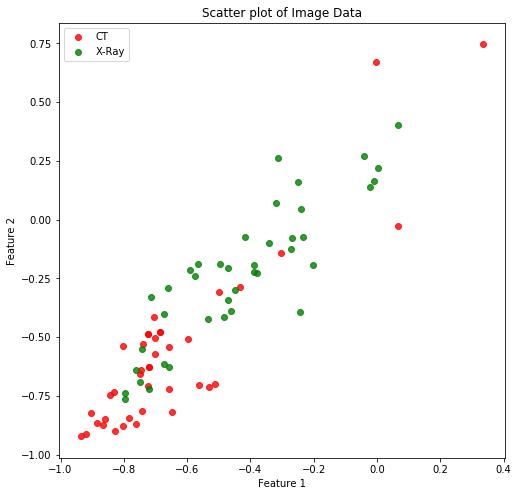

In [69]:
fig, ax = plt.subplots()

ax.scatter(numpy_img_ct[:, 0], numpy_img_ct[:, 1], c="red", label="CT", alpha=0.8)
ax.scatter(numpy_img_xray[:, 0], numpy_img_xray[:, 1], c="green", label="X-Ray", alpha=0.8)

ax.legend()
plt.title('Scatter plot of Image Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

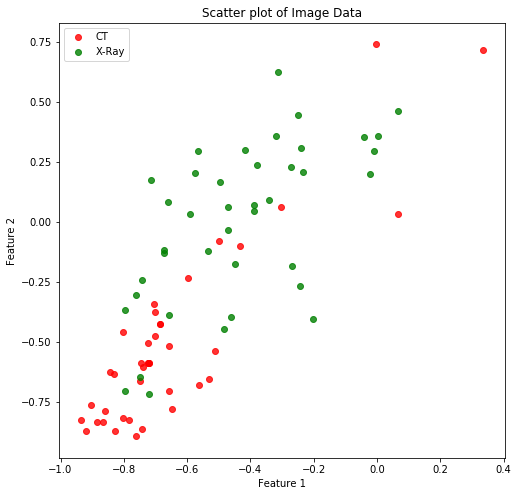

In [70]:
fig, ax = plt.subplots()

ax.scatter(numpy_img_ct[:, 0], numpy_img_ct[:, 2], c="red", label="CT", alpha=0.8)
ax.scatter(numpy_img_xray[:, 0], numpy_img_xray[:, 2], c="green", label="X-Ray", alpha=0.8)

ax.legend()
plt.title('Scatter plot of Image Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

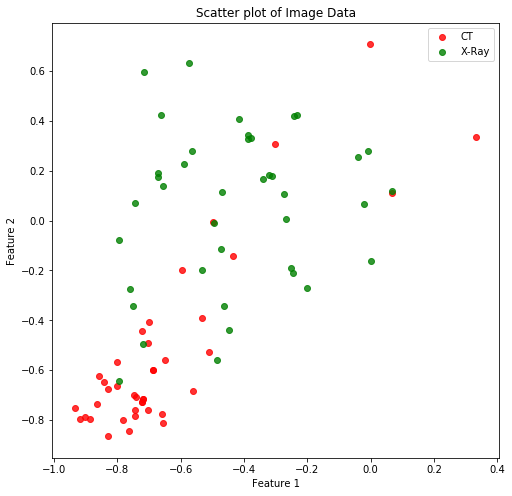

In [71]:
fig, ax = plt.subplots()

ax.scatter(numpy_img_ct[:, 0], numpy_img_ct[:, 3], c="red", label="CT", alpha=0.8)
ax.scatter(numpy_img_xray[:, 0], numpy_img_xray[:, 3], c="green", label="X-Ray", alpha=0.8)

ax.legend()
plt.title('Scatter plot of Image Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

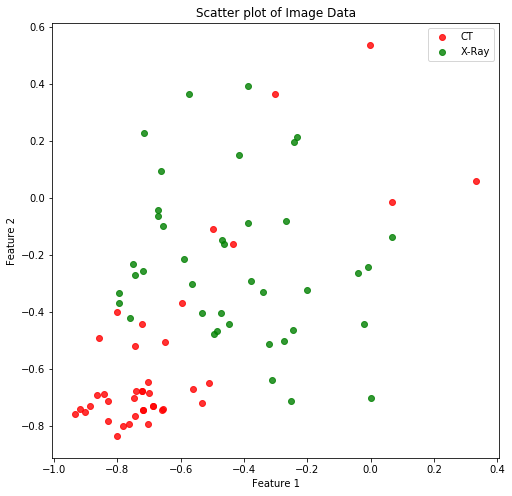

In [72]:
fig, ax = plt.subplots()

ax.scatter(numpy_img_ct[:, 0], numpy_img_ct[:, 4], c="red", label="CT", alpha=0.8)
ax.scatter(numpy_img_xray[:, 0], numpy_img_xray[:, 4], c="green", label="X-Ray", alpha=0.8)

ax.legend()
plt.title('Scatter plot of Image Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

(<class 'torch.Tensor'>, torch.Size([40, 200, 11, 11]))
(<class 'torch.Tensor'>, torch.Size([40, 24200]))
(40, 4)


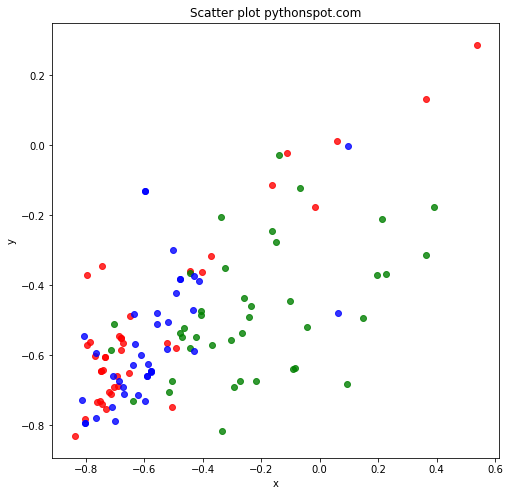

In [80]:
mri_path = "/home/monica/Research/Insight/data_generation/latentVisualization/mri"
data_mri = RadiologyImages(image_folder=mri_path, image_ext='.png')
loader_mri = DataLoader(dataset=data_mri, batch_size=40, shuffle=False)

for i, (images, labels) in enumerate(loader_mri):
    if torch.cuda.is_available():
        images = Variable(images.cuda())

    output = model(images)
    features = activations.features
    print(type(features), features.shape)

    reshaped_img_tensor = features.view(-1, features.shape[1] * features.shape[2] * features.shape[3])
    print(type(reshaped_img_tensor), reshaped_img_tensor.shape)

    pca = decomposition.PCA(n_components=4)
    numpy_img_mri = reshaped_img_tensor.data.cpu().numpy()
    pca.fit(numpy_img_mri)
    X_ct = pca.transform(reshaped_img_tensor.data.cpu().numpy())
    print(X_ct.shape)
    break
    
plt.scatter(numpy_img_ct[:, 4], numpy_img_ct[:, 5], c="red", alpha=0.8)
plt.scatter(numpy_img_xray[:, 4], numpy_img_xray[:, 5], c="green", alpha=0.8)
plt.scatter(numpy_img_mri[:, 4], numpy_img_mri[:, 5], c="blue", alpha=0.8)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()